<a href="https://colab.research.google.com/github/abhinav-1023/ML-Python-Practice/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impoting all the libraries that needed


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


Data Collection

In [15]:
heart_dataSet=pd.read_csv('/content/heart.csv')
heart_dataSet.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Preprocessing

In [16]:
heart_dataSet['target'].value_counts()
heart_dataSet.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [17]:
heart_dataSet.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Data visulization


In [18]:
heart_dataSet_X=heart_dataSet.drop(columns='target',axis=1)
heart_dataSet_Y=heart_dataSet['target']
print(heart_dataSet_X)
print(heart_dataSet_Y)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

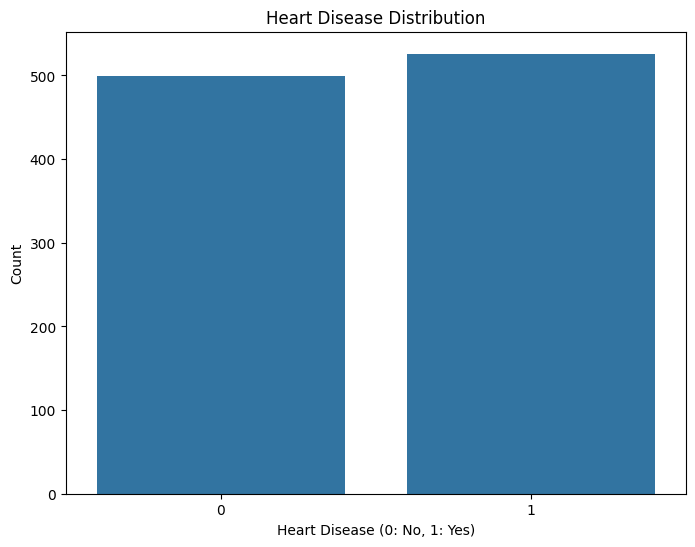

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_dataSet)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

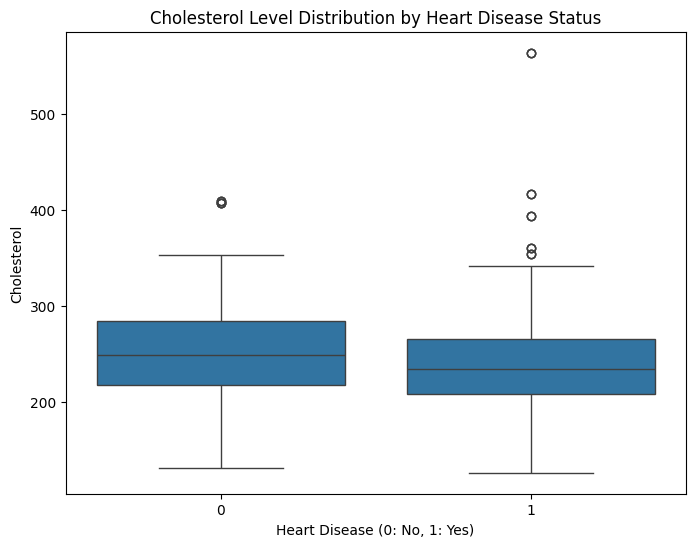

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=heart_dataSet)
plt.title('Cholesterol Level Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()

Spliting Data into Traning and Test

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(heart_dataSet_X,heart_dataSet_Y,test_size=0.1,random_state=3 )

Model Selection & Model Fitting

In [22]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation For Training Data


In [23]:
predection_training_data=model.predict(X_train)
accuracy_training_data=accuracy_score(predection_training_data,Y_train)
print(accuracy_training_data)

0.8557483731019523


Model Evaluation For Testing Data

In [24]:
predection_test_data=model.predict(X_test)
accuracy_test_data=accuracy_score(predection_test_data,Y_test)
print(accuracy_test_data)

0.8058252427184466


In [ ]:
input_data=(47,1,0,110,275,0,0,118,1,1,1,1,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have a heart disease')
else:
    print('The person has a heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
